In [18]:
!pip install apyori

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [21]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_lenght = 2, max_lenght = 2)

In [22]:
results = list(rules)

In [ ]:
results

In [36]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [37]:
# pd.set_option('display.max_rows', None)

In [ ]:
resultsinDataFrame

In [34]:
resultsinDataFrame.nlargest(n= 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
97,frozen vegetables,mineral water,0.003066,0.383333,7.987176
150,frozen vegetables,mineral water,0.003066,0.383333,7.987176
96,olive oil,mineral water,0.003333,0.294118,6.128268
149,olive oil,mineral water,0.003333,0.294118,6.128268
132,mineral water,olive oil,0.003866,0.402778,6.128268
59,mineral water,olive oil,0.003866,0.402778,6.115863
50,tomato sauce,ground beef,0.003066,0.216981,5.535971
122,tomato sauce,ground beef,0.003066,0.216981,5.535971
28,fromage blanc,honey,0.003333,0.245098,5.178818
3,fromage blanc,honey,0.003333,0.245098,5.164271


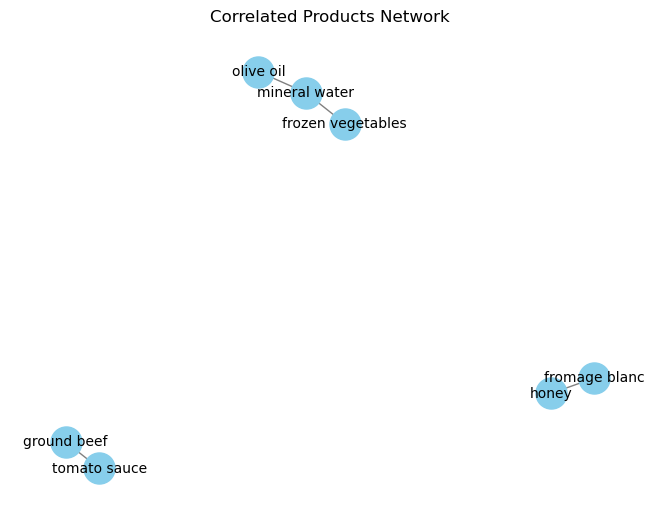

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data
correlated_products = [
    ("frozen vegetables", "mineral water"),
    ("olive oil", "mineral water"),
    ("mineral water", "olive oil"),
    ("tomato sauce", "ground beef"),
    ("fromage blanc", "honey")
]

# Create a new graph
G = nx.Graph()

# Add edges (product correlations) to the graph
for products in correlated_products:
    G.add_edge(products[0], products[1])

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, node_color='skyblue', edge_color='gray')

# Set plot title
plt.title("Correlated Products Network")

# Show the graph
plt.show()



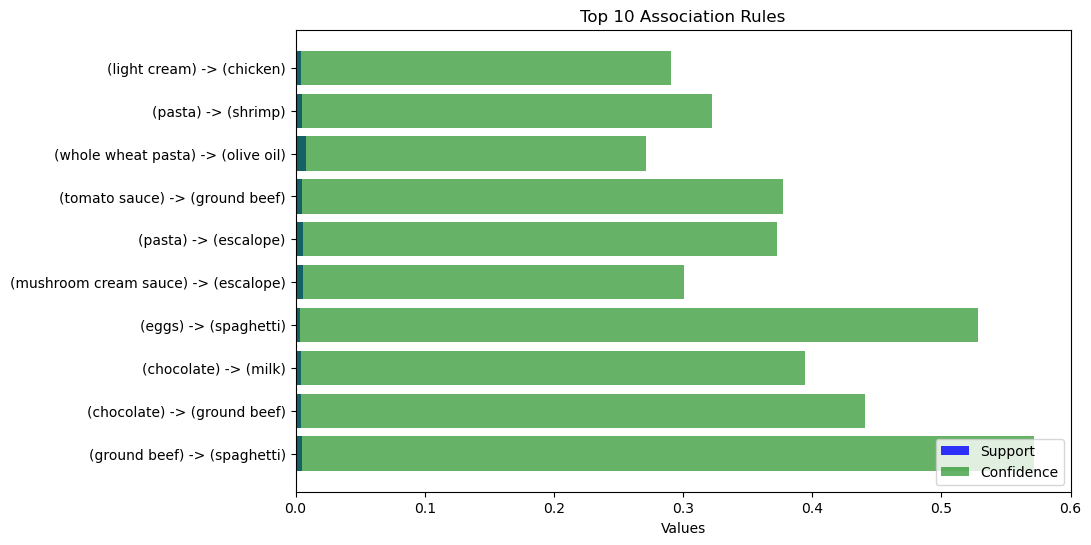

In [30]:
import matplotlib.pyplot as plt

# Data for the chart
association_rules = [
    ('(ground beef) -> (spaghetti)', 0.004799, 0.571429),
    ('(chocolate) -> (ground beef)', 0.003999, 0.441176),
    ('(chocolate) -> (milk)', 0.003999, 0.394737),
    ('(eggs) -> (spaghetti)', 0.003733, 0.528302),
    ('(mushroom cream sauce) -> (escalope)', 0.005733, 0.300699),
    ('(pasta) -> (escalope)', 0.005866, 0.372881),
    ('(tomato sauce) -> (ground beef)', 0.005333, 0.377358),
    ('(whole wheat pasta) -> (olive oil)', 0.007999, 0.271493),
    ('(pasta) -> (shrimp)', 0.005066, 0.322034),
    ('(light cream) -> (chicken)', 0.004533, 0.290598)
]

# Extracting data for plotting
association_labels = [rule[0] for rule in association_rules]
support_values = [rule[1] for rule in association_rules]
confidence_values = [rule[2] for rule in association_rules]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(association_rules)), support_values, align='center', alpha=0.8, color='b', label='Support')
plt.barh(range(len(association_rules)), confidence_values, align='center', alpha=0.6, color='g', label='Confidence')

# Customizing the chart
plt.yticks(range(len(association_rules)), association_labels)
plt.xlabel('Values')
plt.title('Top 10 Association Rules')

# Adding a legend
plt.legend(loc='lower right')

# Displaying the chart
plt.show()
